In [23]:
from pycaret.regression import *

import pandas as pd


In [24]:
df = pd.read_csv("ExpreimentList_20220620125403.csv")

In [25]:
df.describe()

,TotalReads(M),Base(Gb),Q30(%),SplitRate(%),ESR(%),Lag1(%),Lag2(%),Runon1(%),Runon2(%),R1_Q30(%),...,R1-N%,R2-N%,Total-N%,R1-EstErr%,R2-EstErr%,Total-EstErr%,Read1 Length,Read2 Length,Barcode1 Length,Duration
count,15721.000000,1.571600e+04,15720.000000,6737.000000,15601.000000,15947.000000,8879.000000,15947.000000,8879.000000,8866.000000,...,8866.000000,8866.000000,15716.000000,8866.000000,8866.000000,15716.000000,18546.000000,18538.000000,9783.000000,14424.000000
mean,410.532552,6.004595e+01,85.242602,92.055361,78.658499,-8.879379,-2.389236,-8.912093,-2.397954,90.592054,...,0.371449,0.391584,1.266067,0.717053,0.996055,2.001591,77.521029,57.577786,8.814270,25.451165
std,158.701991,5.715130e+01,14.570550,22.261887,371.825869,28.790710,15.886927,28.785375,15.886313,10.731758,...,5.411452,5.496862,9.274934,5.428680,5.566853,9.371878,71.533126,70.531370,6.030671,36.289603
min,0.000000,1.000000e-07,0.000000,0.000000,0.010000,-100.000000,-100.000000,-100.000000,-100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.050000,0.020000,0.000000,-1.000000,0.000000,-3122.010000
25%,347.140000,5.036908e+00,83.880000,97.450000,66.950000,0.080000,0.120000,0.060000,0.080000,88.860000,...,0.000000,0.000000,0.000000,0.120000,0.240000,0.220000,10.000000,0.000000,10.000000,4.527500
50%,470.260000,4.597971e+01,90.070000,98.850000,78.910000,0.120000,0.140000,0.090000,0.100000,93.620000,...,0.010000,0.000000,0.010000,0.220000,0.400000,0.390000,60.000000,5.000000,10.000000,14.965000
75%,506.190000,1.013989e+02,93.522500,99.160000,84.290000,0.190000,0.180000,0.190000,0.230000,96.290000,...,0.020000,0.020000,0.050000,0.410000,0.660000,0.880000,150.000000,101.000000,10.000000,45.892500
max,1061.690000,3.759228e+02,99.000000,99.820000,43200.000000,14.220000,8.800000,33.530000,10.170000,99.130000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1001.000000,1001.000000,50.000000,139.530000


In [26]:
len(df)

19213

In [27]:
df = df[df["Q30(%)"].notna()]
df.drop(["Slide", "Stop", "Start"], axis=1, inplace=True)

In [28]:
len(df)

15720

In [29]:
df.head()

,Instrument,Solution,Position,Lane,Barcode,TotalReads(M),Base(Gb),Q30(%),SplitRate(%),ESR(%),...,R1-EstErr%,R2-EstErr%,Total-EstErr%,Basecall Version,ISW Version,Read1 Length,Read2 Length,Barcode1 Length,Duration,Status
0,V100400190303,Customize,A,L01,1~128,434.47,4.344740,80.92,NaN,71.43,...,NaN,NaN,0.66,Version 1.0.8.208,1.4.0.184,10.0,0.0,NaN,2.74,Success
1,V100400190303,Customize,A,L02,1~128,488.45,4.884522,83.59,NaN,80.30,...,NaN,NaN,0.51,Version 1.0.8.208,1.4.0.184,10.0,0.0,NaN,2.74,Success
2,V100400190303,Customize,A,L03,1~128,488.45,4.884522,83.59,NaN,80.30,...,NaN,NaN,0.51,Version 1.0.8.208,1.4.0.184,10.0,0.0,NaN,2.74,Success
3,V100400190303,Customize,A,L04,1~128,476.89,4.768870,87.98,NaN,78.40,...,NaN,NaN,0.37,Version 1.0.8.208,1.4.0.184,10.0,0.0,NaN,2.74,Success
4,V100400190303,Customize,A,L01,1~128,458.97,4.589740,85.38,NaN,75.45,...,NaN,NaN,0.42,Version 1.0.8.208,1.4.0.184,10.0,0.0,NaN,2.75,Success


In [30]:
s = setup(df, target = 'Q30(%)')

,Description,Value
0,Session id,4732
1,Target,Q30(%)
2,Target type,Regression
3,Data shape,"(15720, 42)"
4,Train data shape,"(11003, 42)"
5,Test data shape,"(4717, 42)"
6,Numeric features,28
7,Categorical features,8
8,Rows with missing values,73.6%
9,Preprocess,True


In [31]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.4349,10.4900,3.2313,0.9493,0.0662,0.0265,0.5460
knn,K Neighbors Regressor,2.5184,26.6512,5.1272,0.8713,0.1075,0.0497,0.0730
lasso,Lasso Regression,3.4751,36.6559,6.0396,0.8227,0.2134,0.1006,0.0820
br,Bayesian Ridge,2.9752,36.7733,5.9191,0.8191,0.1862,0.0651,0.0750
en,Elastic Net,3.5023,37.4540,6.1050,0.8189,0.2093,0.1032,0.0770
ridge,Ridge Regression,2.9743,38.1490,5.9881,0.8118,0.1854,0.0649,0.0630
lr,Linear Regression,2.9744,38.2161,5.9914,0.8114,0.1854,0.0649,0.1780
lar,Least Angle Regression,3.1830,43.7439,6.4767,0.7872,0.1903,0.0647,0.0680
gbr,Gradient Boosting Regressor,2.9244,47.7763,6.9020,0.7687,0.2741,0.0941,0.5440
omp,Orthogonal Matching Pursuit,3.9714,48.0381,6.9208,0.7674,0.2479,0.0714,0.1010


In [32]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=4732)


In [33]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

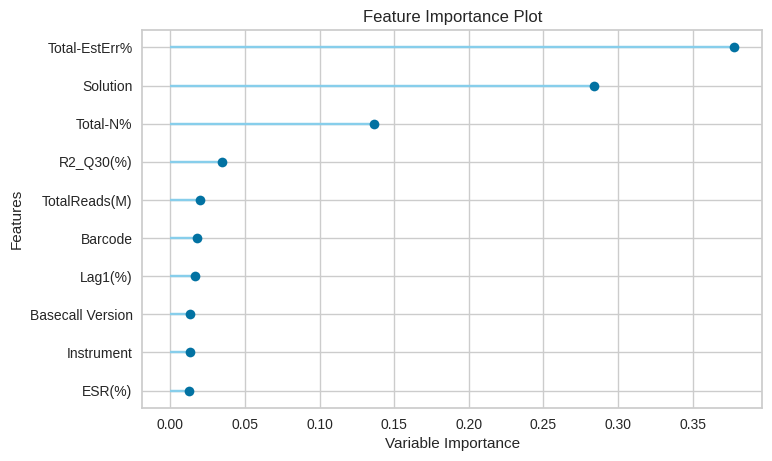

In [34]:
plot_model(best, plot = 'feature')

In [35]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.4518,2.2140,1.4880,0.9901,0.0380,0.0105


,Instrument,Solution,Position_A,Position_constant,Position_B,Lane,Barcode,TotalReads(M),Base(Gb),SplitRate(%),...,Read1 Length,Read2 Length,Barcode1 Length,Duration,Status_Success,Status_NoRun,Status_Unknown,Status_Failure,Q30(%),Label
11003,85.138784,89.704545,1.0,0.0,0.0,85.438840,85.424268,496.410004,14.892366,92.404037,...,30.0,0.0,10.412145,6.040000,1.0,0.0,0.0,0.0,78.589996,78.563000
11004,87.794359,86.147979,0.0,1.0,0.0,85.367199,83.934455,481.970001,24.098642,92.404037,...,50.0,0.0,10.412145,29.177727,1.0,0.0,0.0,0.0,90.639999,90.633199
11005,92.036916,90.439629,0.0,0.0,1.0,85.367153,85.422781,444.309998,88.862984,99.150002,...,100.0,100.0,10.000000,43.349998,1.0,0.0,0.0,0.0,90.790001,90.902200
11006,60.428529,22.930741,1.0,0.0,0.0,85.387928,85.431139,564.640015,0.564639,92.404037,...,1.0,0.0,10.412145,0.230000,1.0,0.0,0.0,0.0,22.190001,22.203900
11007,92.232973,94.248752,0.0,0.0,1.0,85.366093,85.422355,483.640015,145.092850,92.404037,...,150.0,150.0,10.412145,36.020000,1.0,0.0,0.0,0.0,94.290001,94.433899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15715,89.129500,83.936945,1.0,0.0,0.0,85.368901,83.937041,584.789978,1.754358,92.404037,...,3.0,0.0,10.412145,1.550000,1.0,0.0,0.0,0.0,85.019997,85.582500
15716,77.417343,71.486429,1.0,0.0,0.0,85.653709,85.423293,566.559998,6.232169,92.404037,...,11.0,0.0,10.412145,4.360000,1.0,0.0,0.0,0.0,86.589996,77.327801
15717,87.786938,94.672000,1.0,0.0,0.0,85.649575,85.422144,476.929993,16.692406,93.400002,...,35.0,0.0,10.000000,9.550000,1.0,0.0,0.0,0.0,96.019997,95.754100
15718,85.120514,83.936759,0.0,1.0,0.0,85.654252,83.936889,0.010000,0.002892,0.000000,...,150.0,150.0,10.000000,29.177727,1.0,0.0,0.0,0.0,85.349998,85.724600
